# Preprocesado de información


**Luciano Moliterno - Diciembre 2024**

Análisis de Datos Para Finanzas

*Autor*: [Luciano Moliterno](https://www.linkedin.com/in/luciano-moliterno-gonzalez/)

Los datos han sido obtenidos del siguiente [enlace](https://github.com/datadista/datasets/tree/master/COVID%2019).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('data/new_ccaa_covid19_datos_sanidad_nueva_serie.csv')

In [ ]:
df

,Fecha;cod_ine;CCAA;Casos;Fallecidos;Hospitalizados;UCI
0,2020-01-01;0;No consta;0;0;0;0.0
1,2020-01-01;1;Andalucía;0;0;3;0.0
2,2020-01-01;2;Aragón;0;0;0;0.0
3,2020-01-01;3;Asturias;0;0;0;0.0
4,2020-01-01;4;Baleares;0;0;0;
...,...
16235,2022-03-22;15;Navarra;0;0;0;0.0
16236,2022-03-22;16;País Vasco;41;0;0;0.0
16237,2022-03-22;17;La Rioja;0;0;0;0.0
16238,2022-03-22;18;Ceuta;6;0;0;0.0


<font color='#d64040'>**¡CUIDADO!**</font> Hay que indicar el separador utilizado en el set de datos para leerlo correctamente.

In [ ]:
df = pd.read_csv('data/new_ccaa_covid19_datos_sanidad_nueva_serie.csv', sep=';')

In [ ]:
df

,Fecha,cod_ine,CCAA,Casos,Fallecidos,Hospitalizados,UCI
0,2020-01-01,0,No consta,0,0,0,0.0
1,2020-01-01,1,Andalucía,0,0,3,0.0
2,2020-01-01,2,Aragón,0,0,0,0.0
3,2020-01-01,3,Asturias,0,0,0,0.0
4,2020-01-01,4,Baleares,0,0,0,NaN
...,...,...,...,...,...,...,...
16235,2022-03-22,15,Navarra,0,0,0,0.0
16236,2022-03-22,16,País Vasco,41,0,0,0.0
16237,2022-03-22,17,La Rioja,0,0,0,0.0
16238,2022-03-22,18,Ceuta,6,0,0,0.0


Comprobamos las dimensiones de nuestro set de datos.

In [ ]:
df.shape

(16240, 7)

Para cada variable, obtenemos sus estadísticos.

In [ ]:
df.describe()

,cod_ine,Casos,Fallecidos,Hospitalizados,UCI
count,16240.000000,16240.000000,16240.000000,16240.000000,16237.000000
mean,9.500000,702.638116,6.288116,31.466687,2.999877
std,5.766459,2132.534557,16.083299,75.481605,6.543758
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.750000,21.000000,0.000000,2.000000,0.000000
50%,9.500000,124.000000,1.000000,9.000000,1.000000
75%,14.250000,499.000000,6.000000,30.000000,3.000000
max,19.000000,46222.000000,334.000000,1934.000000,135.000000


Detectamos que la variable UCI contiene algunos missings values, comprobamos que esto es cierto.

### Missing values

In [ ]:
df.isnull()

,Fecha,cod_ine,CCAA,Casos,Fallecidos,Hospitalizados,UCI
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...
16235,False,False,False,False,False,False,False
16236,False,False,False,False,False,False,False
16237,False,False,False,False,False,False,False
16238,False,False,False,False,False,False,False


In [ ]:
df.notnull()

,Fecha,cod_ine,CCAA,Casos,Fallecidos,Hospitalizados,UCI
0,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,False
...,...,...,...,...,...,...,...
16235,True,True,True,True,True,True,True
16236,True,True,True,True,True,True,True
16237,True,True,True,True,True,True,True
16238,True,True,True,True,True,True,True


In [ ]:
df.isna().sum()

Fecha             0
cod_ine           0
CCAA              0
Casos             0
Fallecidos        0
Hospitalizados    0
UCI               3
dtype: int64

Comprobamos que, efectivamente, tres de los registros de la variable UCI contienen missing values.

Podemos eliminarlos o imputarlos.

In [ ]:
df[df.UCI.isna()]

,Fecha,cod_ine,CCAA,Casos,Fallecidos,Hospitalizados,UCI
4,2020-01-01,4,Baleares,0,0,0,NaN
65,2020-01-04,5,Canarias,0,0,0,NaN
1068,2020-02-23,8,Castilla La Mancha,0,0,0,NaN


Para no perder registros, decidimos imputar a 0 los valores missing.

In [ ]:
df['UCI'] = df['UCI'].fillna(0)

Comprobamos que hemos imputado los missings.

In [ ]:
df.isna().sum()

Fecha             0
cod_ine           0
CCAA              0
Casos             0
Fallecidos        0
Hospitalizados    0
UCI               0
dtype: int64

### Outliers

In [ ]:
df.columns

Index(['Fecha', 'cod_ine', 'CCAA', 'Casos', 'Fallecidos', 'Hospitalizados',
       'UCI'],
      dtype='object')

In [ ]:
num_cols = ['Casos', 'Fallecidos', 'Hospitalizados','UCI']

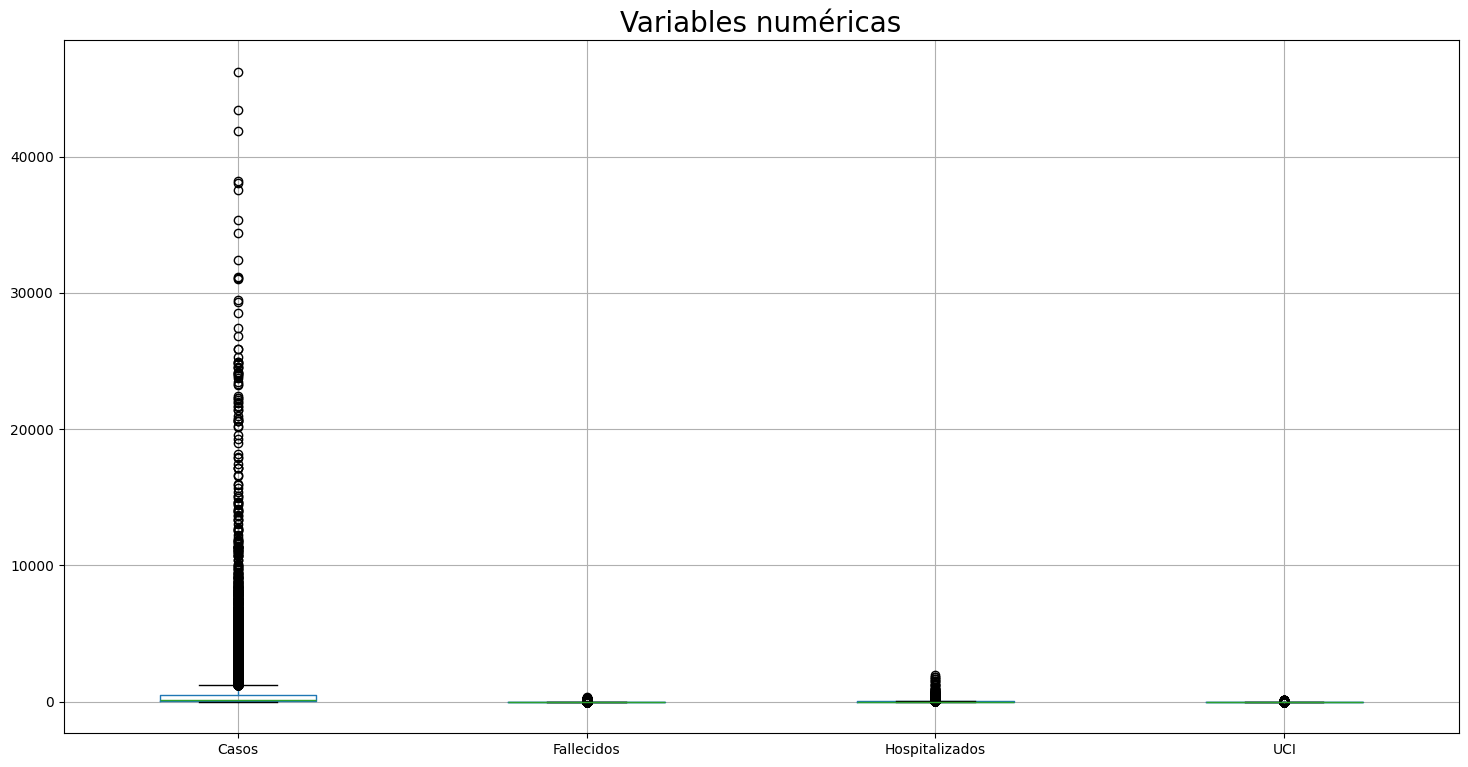

In [ ]:
plt.figure(figsize=(18,9))
df[num_cols].boxplot()
plt.title("Variables numéricas", fontsize=20)
plt.show()

Observamos que la variable 'Casos' tiene bastantes valores anómalos, comprobamos de cuántos registros se trata y si tiene sentido en nuestro problema.

In [ ]:
df[df['Casos'] > 500]

,Fecha,cod_ine,CCAA,Casos,Fallecidos,Hospitalizados,UCI
1393,2020-03-10,13,Madrid,660,25,411,34.0
1413,2020-03-11,13,Madrid,836,25,548,47.0
1433,2020-03-12,13,Madrid,975,39,584,51.0
1453,2020-03-13,13,Madrid,889,48,586,76.0
1473,2020-03-14,13,Madrid,899,64,637,66.0
...,...,...,...,...,...,...,...
16211,2022-03-21,11,Extremadura,870,0,3,0.0
16212,2022-03-21,12,Galicia,1231,0,37,0.0
16213,2022-03-21,13,Madrid,1800,0,24,1.0
16214,2022-03-21,14,Murcia,550,3,1,0.0


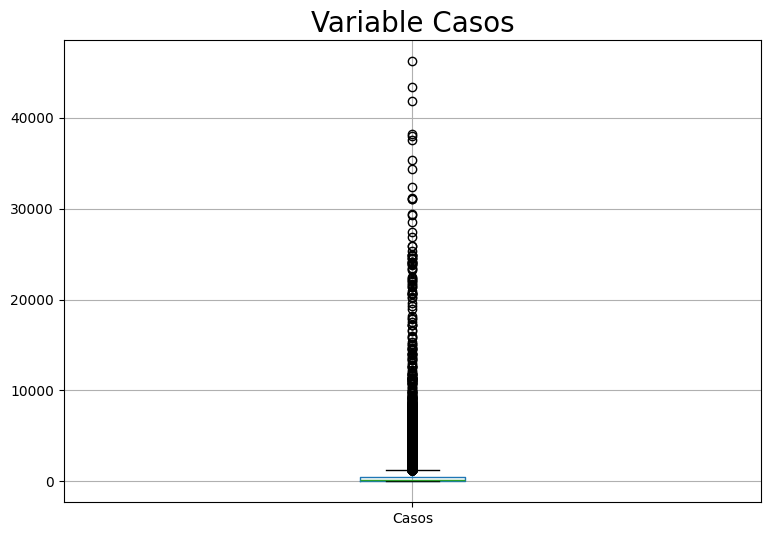

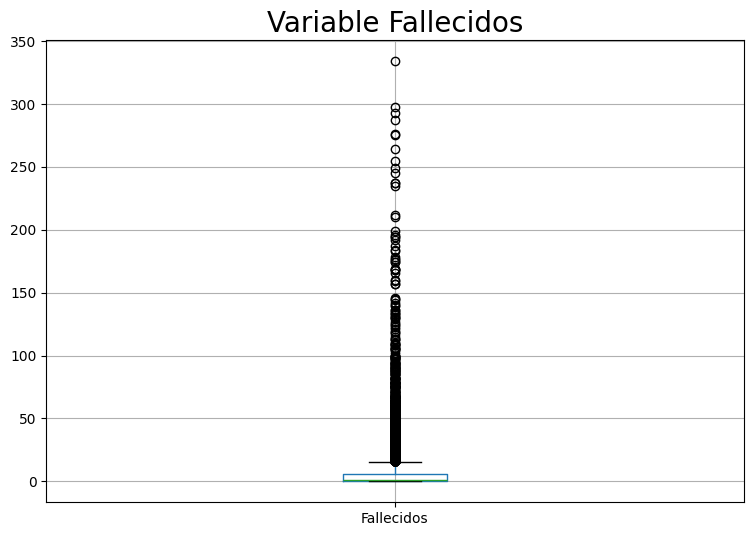

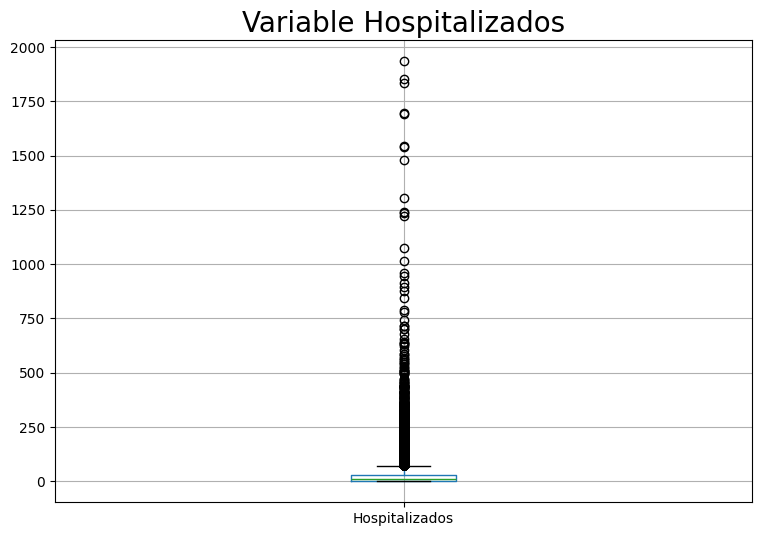

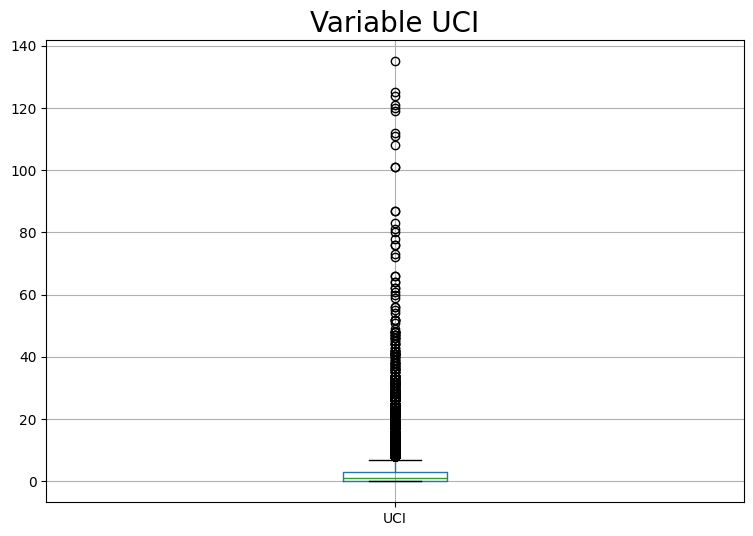

In [ ]:
for col in num_cols:
    plt.figure(figsize=(9,6))
    df[[col]].boxplot()
    plt.title(f"Variable {col}", fontsize=20)
    plt.show()

Comprobamos que se trata de registros válidos, pese a ser outliers, por lo que no hacemos modificaciones ni transformaciones.

### Transformación de variables

In [ ]:
df.dtypes

Fecha              object
cod_ine             int64
CCAA               object
Casos               int64
Fallecidos          int64
Hospitalizados      int64
UCI               float64
dtype: object

La variable *Fecha* es de tipo string, debemos cambiarla a tipo datetime. De manera análoga ocurre con *cod_ine*, la identifica como de tipo entero, pero debería ser un string, ya que se trata de un código identificador.

In [ ]:
df['Fecha'] = pd.to_datetime(df['Fecha'])

In [ ]:
df['cod_ine'] = df['cod_ine'].astype(str)

In [ ]:
df['UCI'] = df['UCI'].astype(int)

In [ ]:
df.dtypes

Fecha             datetime64[ns]
cod_ine                   object
CCAA                      object
Casos                      int64
Fallecidos                 int64
Hospitalizados             int64
UCI                        int64
dtype: object

In [ ]:
df.head()

,Fecha,cod_ine,CCAA,Casos,Fallecidos,Hospitalizados,UCI
0,2020-01-01,0,No consta,0,0,0,0
1,2020-01-01,1,Andalucía,0,0,3,0
2,2020-01-01,2,Aragón,0,0,0,0
3,2020-01-01,3,Asturias,0,0,0,0
4,2020-01-01,4,Baleares,0,0,0,0


Comprobamos si tenemos todas las Comunidades Autónomas.

In [ ]:
df['CCAA']

0         No consta
1         Andalucía
2            Aragón
3          Asturias
4          Baleares
            ...    
16235       Navarra
16236    País Vasco
16237      La Rioja
16238         Ceuta
16239       Melilla
Name: CCAA, Length: 16240, dtype: object

In [ ]:
pd.unique(df['CCAA'])

array(['No consta', 'Andalucía', 'Aragón', 'Asturias', 'Baleares',
       'Canarias', 'Cantabria', 'Castilla y León', 'Castilla La Mancha',
       'Cataluña', 'C. Valenciana', 'Extremadura', 'Galicia', 'Madrid',
       'Murcia', 'Navarra', 'País Vasco', 'La Rioja', 'Ceuta', 'Melilla'],
      dtype=object)

In [ ]:
len(pd.unique(df['CCAA']))

20

Eliminamos aquellos registros en los que no tenemos información de Comunidad Autónoma, es decir, aquellos etiquetados como 'No consta'.

In [ ]:
df = df[df['CCAA'] != 'No consta']
df

,Fecha,cod_ine,CCAA,Casos,Fallecidos,Hospitalizados,UCI
1,2020-01-01,1,Andalucía,0,0,3,0
2,2020-01-01,2,Aragón,0,0,0,0
3,2020-01-01,3,Asturias,0,0,0,0
4,2020-01-01,4,Baleares,0,0,0,0
5,2020-01-01,5,Canarias,0,0,0,0
...,...,...,...,...,...,...,...
16235,2022-03-22,15,Navarra,0,0,0,0
16236,2022-03-22,16,País Vasco,41,0,0,0
16237,2022-03-22,17,La Rioja,0,0,0,0
16238,2022-03-22,18,Ceuta,6,0,0,0


In [ ]:
pd.unique(df['CCAA'])

array(['Andalucía', 'Aragón', 'Asturias', 'Baleares', 'Canarias',
       'Cantabria', 'Castilla y León', 'Castilla La Mancha', 'Cataluña',
       'C. Valenciana', 'Extremadura', 'Galicia', 'Madrid', 'Murcia',
       'Navarra', 'País Vasco', 'La Rioja', 'Ceuta', 'Melilla'],
      dtype=object)

Para tener una visión de los datos que tenemos por Comunidad Autónoma, realizamos un contador de valores.

In [ ]:
df['CCAA'].value_counts()

CCAA
Andalucía             812
Aragón                812
Asturias              812
Baleares              812
Canarias              812
Cantabria             812
Castilla y León       812
Castilla La Mancha    812
Cataluña              812
C. Valenciana         812
Extremadura           812
Galicia               812
Madrid                812
Murcia                812
Navarra               812
País Vasco            812
La Rioja              812
Ceuta                 812
Melilla               812
Name: count, dtype: int64

Generamos histograma de las variables para entender cómo se distribuyen las variables.

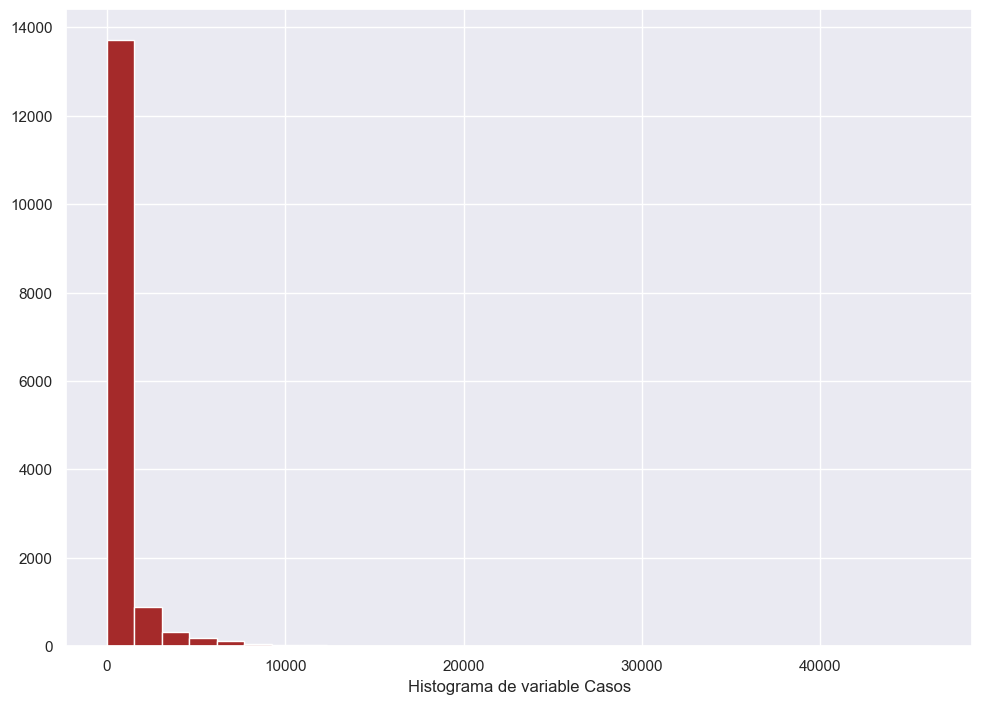

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.hist(df['Casos'],color ="brown", bins=30)
plt.xlabel("Histograma de variable Casos")
plt.show()

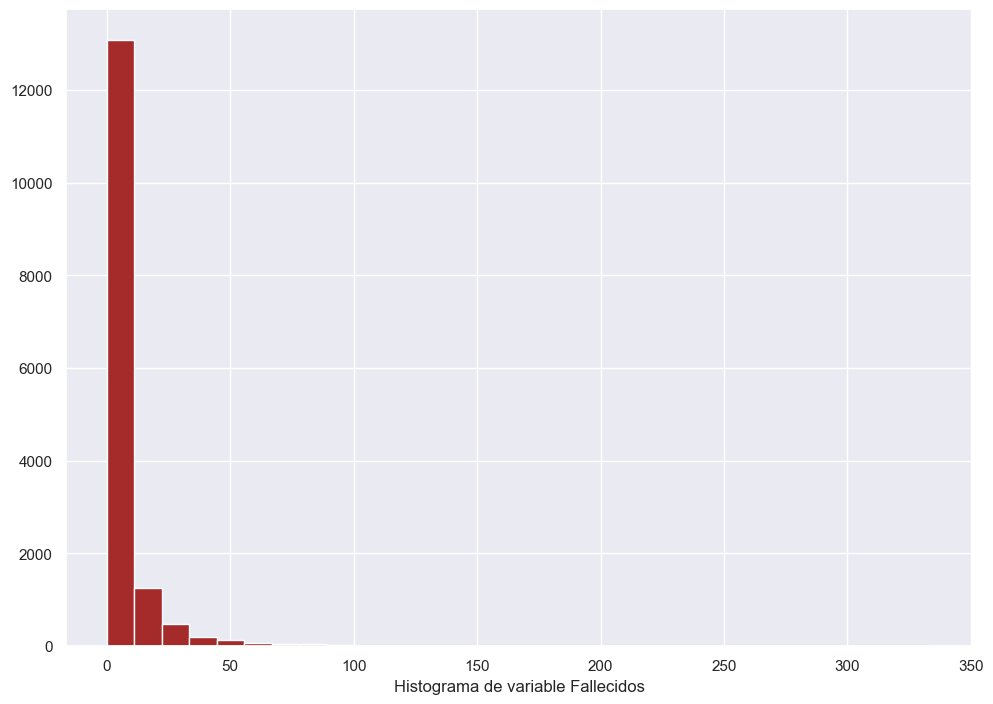

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.hist(df['Fallecidos'],color ="brown", bins=30)
plt.xlabel("Histograma de variable Fallecidos")
plt.show()

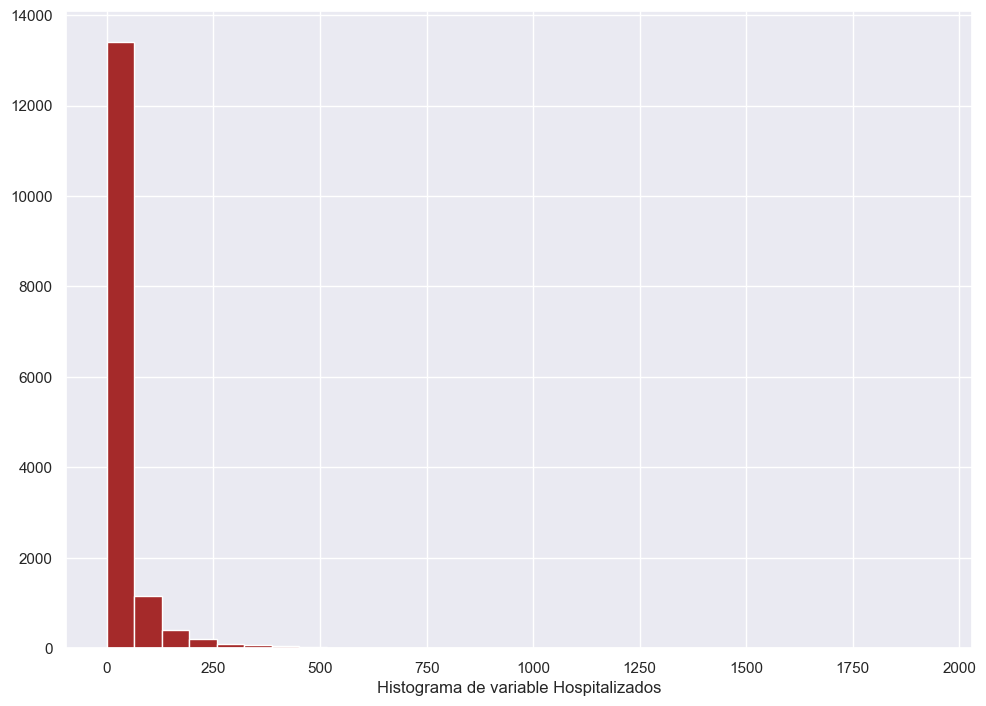

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.hist(df['Hospitalizados'],color ="brown", bins=30)
plt.xlabel("Histograma de variable Hospitalizados")
plt.show()

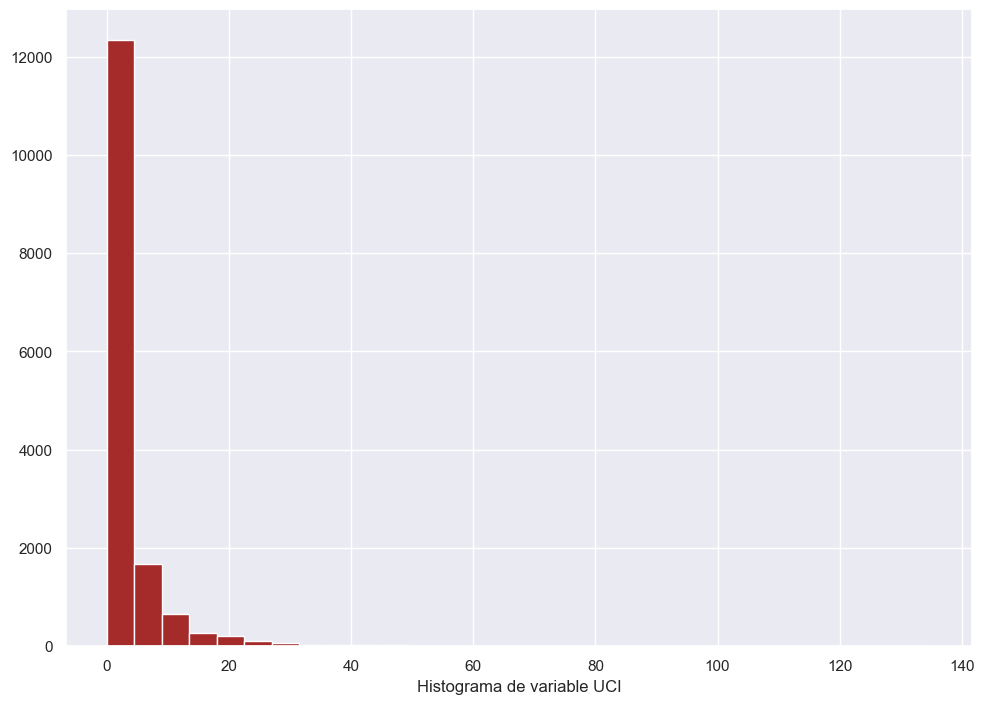

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.hist(df['UCI'],color ="brown", bins=30)
plt.xlabel("Histograma de variable UCI")
plt.show()

In [ ]:
data_cyl = df.loc[df['CCAA'] == 'Castilla y León']
data_cyl.head()

,Fecha,cod_ine,CCAA,Casos,Fallecidos,Hospitalizados,UCI
7,2020-01-01,7,Castilla y León,0,0,0,0
27,2020-01-02,7,Castilla y León,0,0,0,0
47,2020-01-03,7,Castilla y León,0,0,0,0
67,2020-01-04,7,Castilla y León,0,0,0,0
87,2020-01-05,7,Castilla y León,0,0,0,0


In [ ]:
data_cyl = data_cyl.sort_values(by='Fecha')
data_cyl

,Fecha,cod_ine,CCAA,Casos,Fallecidos,Hospitalizados,UCI
7,2020-01-01,7,Castilla y León,0,0,0,0
27,2020-01-02,7,Castilla y León,0,0,0,0
47,2020-01-03,7,Castilla y León,0,0,0,0
67,2020-01-04,7,Castilla y León,0,0,0,0
87,2020-01-05,7,Castilla y León,0,0,0,0
...,...,...,...,...,...,...,...
16147,2022-03-18,7,Castilla y León,1099,0,17,1
16167,2022-03-19,7,Castilla y León,544,5,14,1
16187,2022-03-20,7,Castilla y León,577,2,27,0
16207,2022-03-21,7,Castilla y León,1171,1,19,0


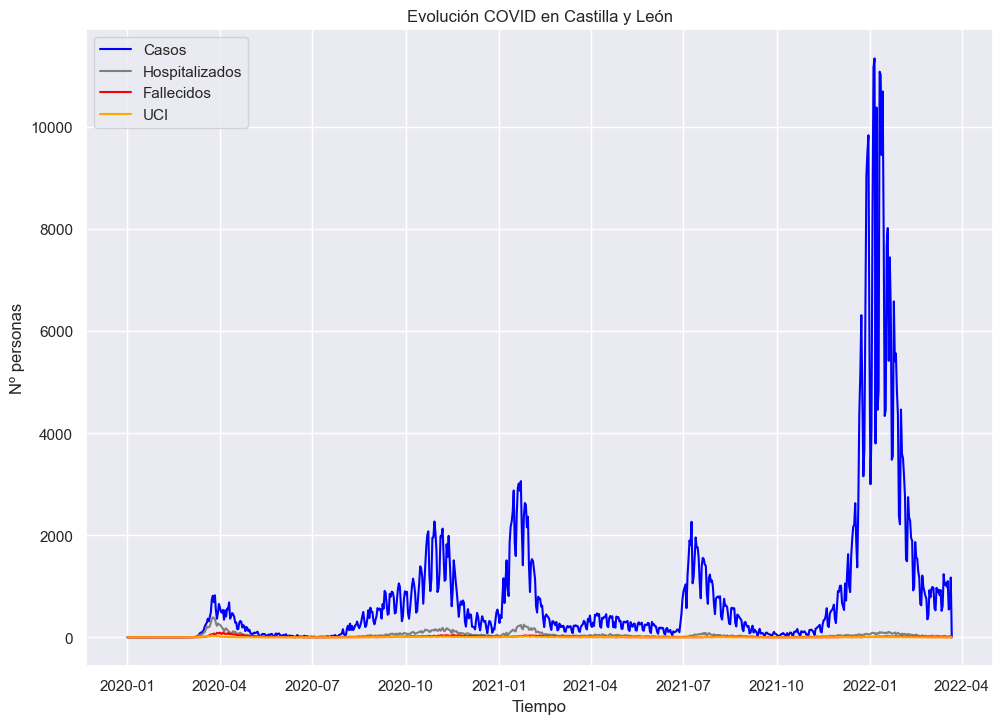

In [ ]:
plt.plot(data_cyl['Fecha'], data_cyl['Casos'], label="Casos", linestyle="-", color="blue")
plt.plot(data_cyl['Fecha'], data_cyl['Hospitalizados'], label="Hospitalizados", linestyle="-", color="grey")
plt.plot(data_cyl['Fecha'], data_cyl['Fallecidos'], label="Fallecidos", linestyle="-", color="red")
plt.plot(data_cyl['Fecha'], data_cyl['UCI'], label="UCI", linestyle="-", color="orange")

plt.title("Evolución COVID en Castilla y León")
plt.xlabel("Tiempo")
plt.ylabel("Nº personas")
plt.legend()

plt.show()

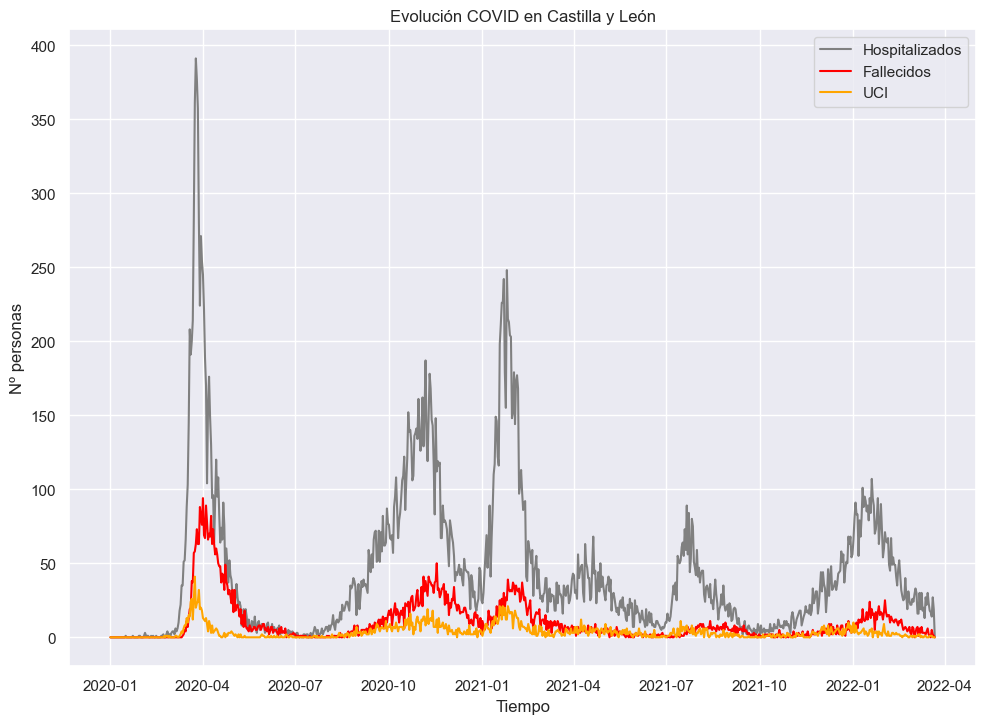

In [ ]:
data_cyl = df.loc[df['CCAA'] == 'Castilla y León']
data_cyl = data_cyl.sort_values(by='Fecha')
plt.plot(data_cyl['Fecha'], data_cyl['Hospitalizados'], label="Hospitalizados", linestyle="-", color="grey")
plt.plot(data_cyl['Fecha'], data_cyl['Fallecidos'], label="Fallecidos", linestyle="-", color="red")
plt.plot(data_cyl['Fecha'], data_cyl['UCI'], label="UCI", linestyle="-", color="orange")

plt.title("Evolución COVID en Castilla y León")
plt.xlabel("Tiempo")
plt.ylabel("Nº personas")
plt.legend()

plt.show()

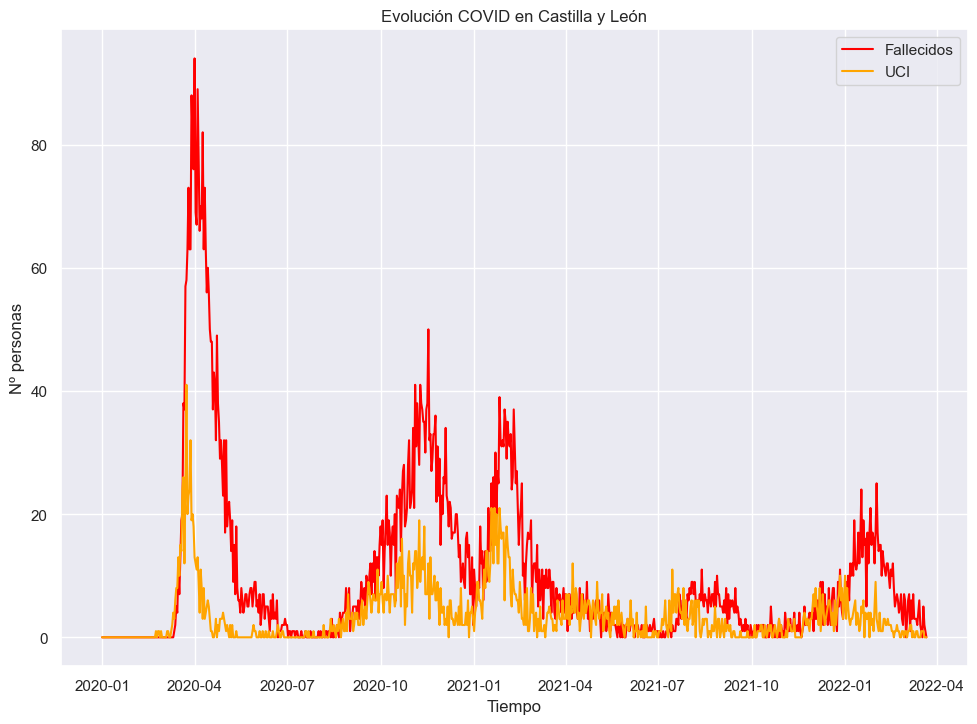

In [ ]:
data_cyl = df.loc[df['CCAA'] == 'Castilla y León']
data_cyl = data_cyl.sort_values(by='Fecha')
plt.plot(data_cyl['Fecha'], data_cyl['Fallecidos'], label="Fallecidos", linestyle="-", color="red")
plt.plot(data_cyl['Fecha'], data_cyl['UCI'], label="UCI", linestyle="-", color="orange")

plt.title("Evolución COVID en Castilla y León")
plt.xlabel("Tiempo")
plt.ylabel("Nº personas")
plt.legend()

plt.show()